In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

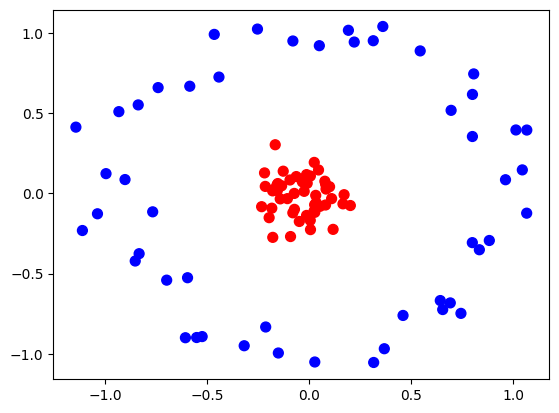

In [11]:
from sklearn.datasets import make_circles

x,y = make_circles(100,factor=0.1,noise=0.1)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='bwr')

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
classifier = SVC(kernel="linear")
classifier.fit(x_train,y_train.ravel())
y_pred = classifier.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.55

In [15]:
zero_one_colormap = ListedColormap(('blue','red'))
def plot_decision_boundary(x,y,clf):
    x_set,y_set = x,y
    x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,
                                 stop = x_set[:,0].max()+1,
                                 step=0.01),
                        np.arange(start=x_set[:,1].min()-1,
                                 stop = x_set[:,1].max()+1,
                                 step=0.01),
                       )
    plt.contourf(x1,x2,clf.predict(np.array([x1.ravel(),
                                            x2.ravel()]).T).reshape(x1.shape),
                alpha=0.75,
                cmap = zero_one_colormap)
    plt.xlim(x1.min(),x1.max())
    plt.ylim(x2.min(),x2.max())
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
                   c = (zero_one_colormap)(i), label=j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    return plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10696\694602816.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],


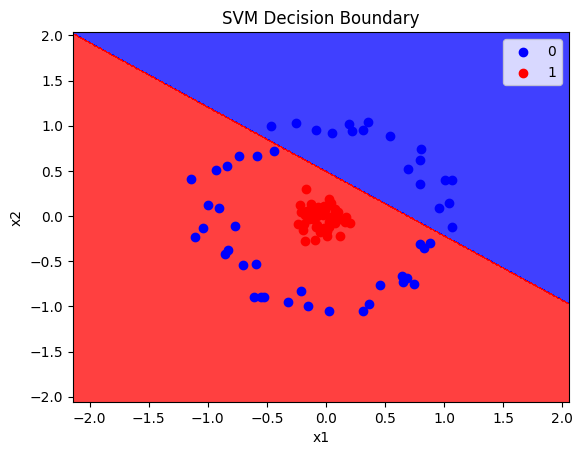

In [17]:
plot_decision_boundary(x,y,classifier)

In [20]:
def plot_3D_plot(x,y):
    r = np.exp(-(x**2).sum(1)) # this is radial basis function (RBF)
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x[:,0],x[:,1],r,c=y,s=100,cmap='bwr')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='x1', ylabel='x2', zlabel='y'>

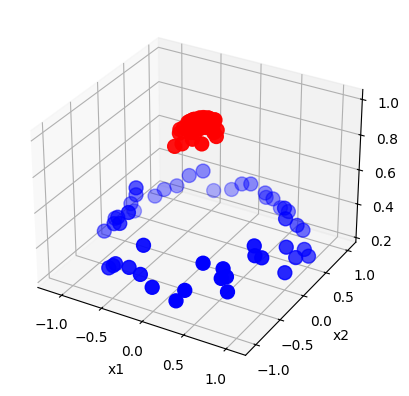

In [21]:
plot_3D_plot(x,y)

In [22]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(x_train,y_train)
y_pred = rbf_classifier.predict(x_test)

In [23]:
accuracy_score(y_test,y_pred)

1.0

C:\Users\USER\AppData\Local\Temp\ipykernel_10696\694602816.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],


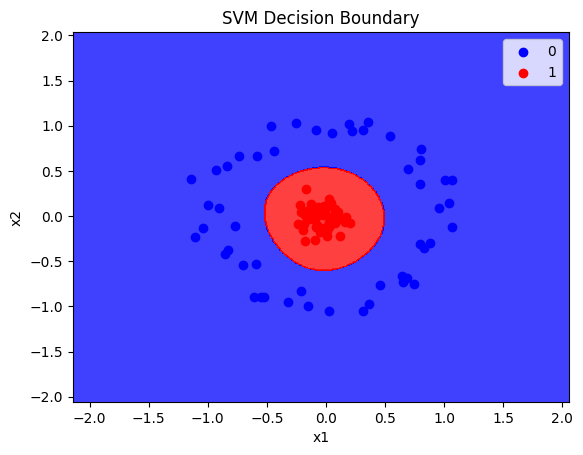

In [24]:
plot_decision_boundary(x,y,rbf_classifier)

In [25]:
poly_classifier = SVC(kernel="poly")
poly_classifier.fit(x_train,y_train)
y_pred = poly_classifier.predict(x_test)

In [26]:
accuracy_score(y_test,y_pred)

0.55

C:\Users\USER\AppData\Local\Temp\ipykernel_10696\694602816.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],


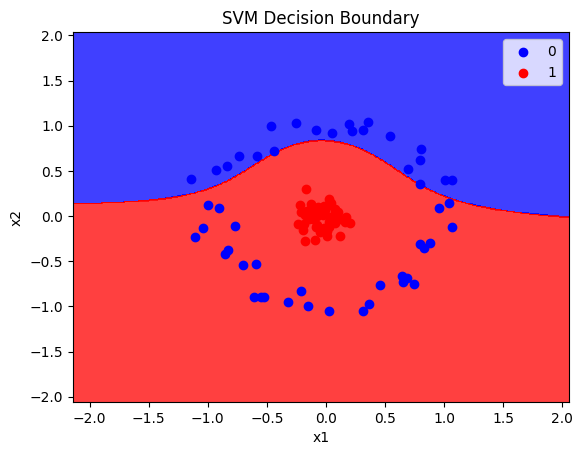

In [27]:
plot_decision_boundary(x,y,poly_classifier)